In [1]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install seaborn 


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

In [8]:
data= pd.read_csv('/Users/kavya/Downloads/untitled folder/dermatology_database_1.csv')

remove and replace null values

In [9]:
data = data.replace('?', np.nan)
data = data.apply(pd.to_numeric)
data = data.fillna(data.median())

In [10]:
#standardise the feautres (feature scaling)
scaler = StandardScaler()
X = data.drop(columns=['class'])
X = scaler.fit_transform(X)
y = data['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train_pca, y_train)

SVC(kernel='linear', random_state=42)

In [22]:
y_pred = svc_model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')
print(f'Classification Report:\n{report}')

Accuracy: 0.8513513513513513
Confusion Matrix:
[[31  0  0  0  0  0]
 [ 0  6  0  3  0  0]
 [ 0  0 13  0  0  0]
 [ 0  3  0  5  0  0]
 [ 0  4  0  0  5  1]
 [ 0  0  0  0  0  3]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.46      0.67      0.55         9
           3       1.00      1.00      1.00        13
           4       0.62      0.62      0.62         8
           5       1.00      0.50      0.67        10
           6       0.75      1.00      0.86         3

    accuracy                           0.85        74
   macro avg       0.81      0.80      0.78        74
weighted avg       0.88      0.85      0.85        74



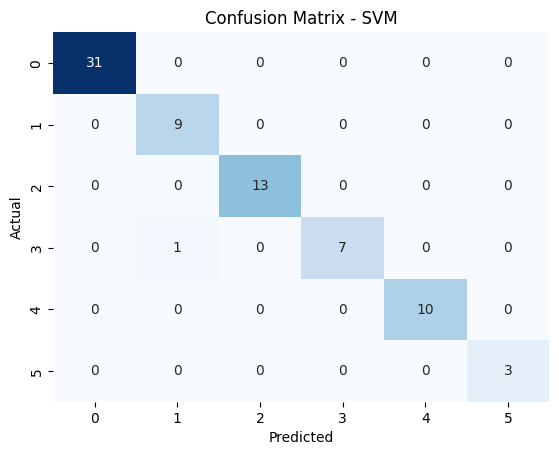

In [14]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

While the SVC model shows strong performance overall with an accuracy of 85.13%, the reduction to 2D using PCA has impacted the model's ability to distinguish between some classes. The model performs exceptionally well for certain classes but struggles with others, indicating a need for further optimization or additional features to improve classification performance in a reduced-dimensional space.

In [23]:
X_pca = np.vstack((X_train_pca, X_test_pca))
y_combined = np.hstack((y_train, y_test))

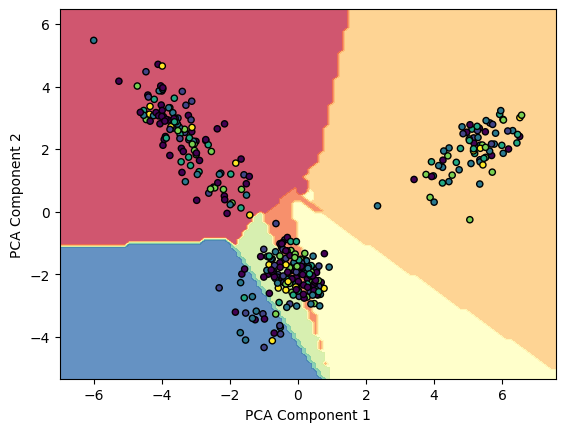

In [24]:
DecisionBoundaryDisplay.from_estimator(
    svc_model,
    X_pca,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel='PCA Component 1',
    ylabel='PCA Component 2'
)

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolors="k")
plt.show()

Each dot represents a data point from the dataset.

The color of each dot indicates the true class label of the data point.
The different colored regions in the background represent the decision boundaries of the SVC model. Each color corresponds to a predicted class.

The SVC model predicts that any new data point falling within a particular colored region belongs to the class associated with that color.

The decision boundary plot visually shows how well the SVC model separates the different classes. Ideally, points of the same class should be clustered together within the same colored region, indicating that the model can accurately classify them.

If we see many points of the same class falling outside their designated region, this indicates misclassifications. 